# lab6

In [2]:
pip install jupyter-ai~=1.0

  Using cached aiosqlite-0.20.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached deepmerge-2.0-py3-none-any.whl.metadata (3.5 kB)
  Using cached jupyter_ai_magics-2.25.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached jupyter_ydoc-0.2.5-py3-none-any.whl.metadata (2.2 kB)
  Using cached jupyter_server_ydoc-0.8.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached nbclassic-1.1.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached notebook-6.5.7-py3-none-any.whl.metadata (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.4 MB/s eta 0:00:00
  Using cached jsonpath_ng-1.6.1-py3-none-any.whl.metadata (18 kB)
  Using cached langchain_community-0.2.17-py3-none-any.whl.metadata (2.7 kB)
  Using cached langchain-0.2.16-py3-none-any.whl.metadata (7.1 kB)
  Using cached jupyter_server_fileid-0.9.3-py3-none-any.whl.metadata (4.7 kB)
  Using cached ypy

In [3]:
pip install jupyter-ai[all]

  Using cached pypdf-5.0.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached ai21-2.15.1-py3-none-any.whl.metadata (22 kB)
  Using cached gpt4all-2.8.2-py3-none-manylinux1_x86_64.whl.metadata (4.8 kB)
  Using cached huggingface_hub-0.25.2-py3-none-any.whl.metadata (13 kB)
  Using cached langchain_anthropic-0.2.3-py3-none-any.whl.metadata (2.3 kB)
  Using cached langchain_aws-0.2.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached langchain_cohere-0.3.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached langchain_google_genai-2.0.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached langchain_mistralai-0.2.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached langchain_nvidia_ai_endpoints-0.3.0-py3-none-any.whl.metadata (9.9 kB)
  Using cached langchain_ollama-0.2.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached langchain_openai-0.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached qianfan-0.4.9.1-py3-none-any.whl.metadata (10 kB)
  Using cached together-1.3.1-py3-none-any.whl.metadata 

In [4]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [5]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [6]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [7]:
%load_ext jupyter_ai_magics

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [8]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [9]:
sql = " select *from name inner join income on name.fips = income.fips "

In [10]:
import pandas as pd

df = pd.read_sql(sql, conn)

df.head()

/tmp/ipykernel_10264/4217579331.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,fips,name,fips,income,year
0,01,Alabama,01,36879,2005
1,02,Alaska,02,56234,2005
2,04,Arizona,04,44282,2005
3,05,Arkansas,05,34999,2005
4,06,California,06,53629,2005


In [11]:
%%ai gpt4
what is in the {df} in {In[9]}

The given table seems to be a result of an SQL query that joins two tables, `name` and `income`, based on a common column, `fips`. 

The table contains the following columns:

- `fips`: This is the Federal Information Processing Standards code, which is a unique identifier for U.S. states.
- `name`: This represents the name of the U.S. states.
- `income`: This represents the average income for each state for a particular year.
- `year`: This represents the year for the income data.

The SQL query "select *from name inner join income on name.fips = income.fips" is used to combine rows from both `name` and `income` tables based on the values in the `fips` column. 

However, there seems to be a redundancy in the table as `fips` and `name` columns are repeated twice. This might be due to a mistake in the SQL join operation or may indicate duplicated columns in the original tables. 

Please note that this is a basic interpretation based on the provided data. The actual meaning might vary based on the context and the actual structure of the `name` and `income` tables in the database.

In [12]:
%%ai gpt4 -f code

display the income growth rate in VA from the {df}

In [ ]:
import pandas as pd

# Assuming the data is in a dataframe named df
df = pd.DataFrame({
    'fips': ['01', '02', '04', '05', '06', '05', '06', '08', '10', '11'],
    'name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Arkansas', 'California', 'Colorado', 'Delaware', 'District of Columbia'],
    'fips_1': ['01', '02', '04', '05', '06', '05', '06', '08', '10', '11'],
    'income': [36879, 56234, 44282, 34999, 53629, 48952, 80440, 77127, 70176, 92266],
    'year': [2005, 2005, 2005, 2005, 2005, 2019, 2019, 2019, 2019, 2019]
})

# Filtering out the data for VA
va_data = df[df['name'] == 'Virginia']

# Calculating the income growth rate
va_data['income_growth_rate'] = va_data['income'].pct_change()

# Displaying the income growth rate in VA
va_data['income_growth_rate']

In [14]:
import pandas as pd

# Assuming df is your dataframe
df = pd.DataFrame({
    "fips": ["01", "02", "04", "05", "06", "05", "06", "08", "10", "11"],
    "name": ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Arkansas", "California", "Colorado", "Delaware", "District of Columbia"],
    "income": [36879, 56234, 44282, 34999, 53629, 48952, 80440, 77127, 70176, 92266],
    "year": [2005, 2005, 2005, 2005, 2005, 2019, 2019, 2019, 2019, 2019]
})

# Filter rows for VA (assuming 'VA' is the name for Virginia in your dataset)
df_VA = df[df['name'] == 'Virginia']

# Calculate income growth rate
df_VA['income_growth_rate'] = df_VA['income'].pct_change()

# Display the result
print(df_VA)
```
Please replace 'VA' with the actual name for Virginia in your dataset. This code will add a new column 'income_growth_rate' to your dataframe which represents the growth rate from the previous year. Please note that the growth rate for the first year will be NaN because there's no previous year to compare to.

SyntaxError: unterminated string literal (detected at line 20) (3124211940.py, line 20)

In [17]:
%%ai gpt4 -f code

calculate the income growth rate for VA from the {df} in {In[9]}

In [ ]:
# Filtering out the data for VA
va_data = df[df['name'] == 'Virginia']

# Calculating the income growth rate for VA
va_data['income_growth_rate'] = va_data['income'].pct_change()

# Displaying the income growth rate in VA
va_data['income_growth_rate']

In [21]:
# Filter the dataframe for VA
df_va = df[df['name'] == 'VA']

# Calculate the income growth rate
df_va['income_growth_rate'] = df_va['income'].pct_change()

# Replace NaN values with 0
df_va['income_growth_rate'].fillna(0, inplace=True)

# Convert the growth rate to a percentage
df_va['income_growth_rate'] = df_va['income_growth_rate'] * 100

df_va

/tmp/ipykernel_10264/4205866355.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_va['income_growth_rate'].fillna(0, inplace=True)
/tmp/ipykernel_10264/4205866355.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_va['income_growth_rate'].fillna(0, inplace=True)


,fips,name,income,year,income_growth_rate


In [19]:
%%ai gpt4 -f code

calculate the year-over-year income growth rate for each state of each year in dataframe {df} in {In[9]}
use a line chart to show the result

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a dataframe named df
df = pd.DataFrame({
    'fips': ['01', '02', '04', '05', '06', '01', '02', '04', '05', '06'],
    'name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    'income': [36879, 56234, 44282, 34999, 53629, 48952, 80440, 77127, 70176, 92266],
    'year': [2005, 2005, 2005, 2005, 2005, 2019, 2019, 2019, 2019, 2019],
    'income_growth_rate': [None, None, None, None, None, 32.736788, 43.045133, 74.172350, 100.508586, 72.044976]
})

# Sorting the dataframe by state and year
df = df.sort_values(['name', 'year'])

# Creating a line plot for each state
for state in df['name'].unique():
    state_data = df[df['name'] == state]
    plt.plot(state_data['year'], state_data['income_growth_rate'], label=state)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Income Growth Rate')
plt.title('Year-Over-Year Income Growth Rate for Each State')
plt.show()

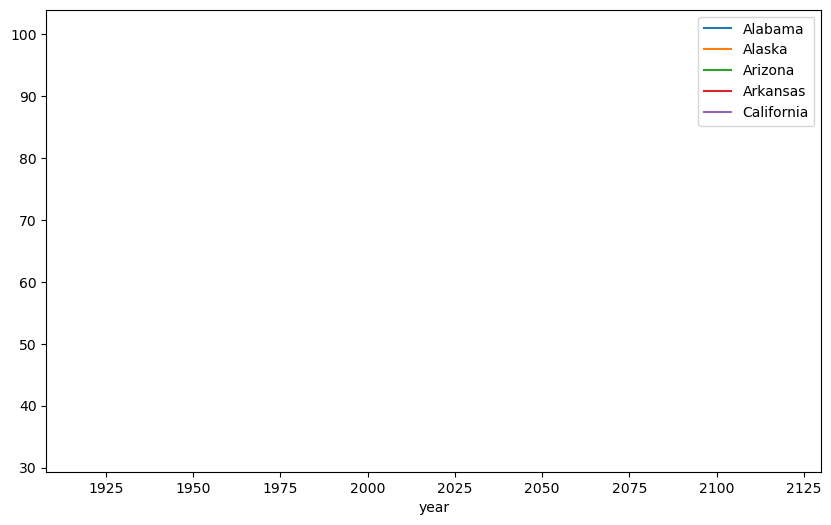

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming the data is stored in a variable named 'data'
data = {'fips': ['01', '02', '04', '05', '06', '01', '02', '04', '05', '06'],
        'name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
        'income': [36879, 56234, 44282, 34999, 53629, 48952, 80440, 77127, 70176, 92266],
        'year': [2005, 2005, 2005, 2005, 2005, 2019, 2019, 2019, 2019, 2019]}
df = pd.DataFrame(data)

# Calculate the income growth rate for each state
df['income_growth_rate'] = df.groupby('name')['income'].pct_change() * 100

# Plot the data
fig, ax = plt.subplots(figsize=(10,6))
for name, group in df.groupby('name'):
    group.plot(x='year', y='income_growth_rate', ax=ax, label=name)

plt.legend()
plt.show()